In [88]:
import os
import glob

import numpy as np
import pandas as pd
from scipy import misc
from IPython.display import Image

import plotly.plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(17, 8.27)})

import warnings
warnings.filterwarnings('ignore')

# Visual features

In [20]:
# path_to_features = 'lumi_detection/lumi_features_no_duplicates.csv'
path_to_visual_features = 'visual_features/visual_features.csv'

visual_features = pd.read_csv(path_to_visual_features)
del visual_features['Timecode']

In [21]:
visual_features[1000:1020].head()

content_val   delta_hue  delta_lum   delta_sat  frame_num  num_people  \
1000    13.631076    7.890763   5.431139   27.571326       1001           0   
1001    16.259218   10.012228   5.895304   32.870120       1002           0   
1002    15.953494    9.577362   7.922543   30.360576       1003           0   
1003   109.673810  103.655210  53.404208  171.962013       1004           0   
1004     0.000000    0.000000   0.000000    0.000000       1005           0   

      num_non_people  num_total_objects  area_people  area_non_people  \
1000               0                  0            0                0   
1001               0                  0            0                0   
1002               0                  0            0                0   
1003               1                  1            0            81326   
1004               0                  0            0                0   

      area_total_objects  
1000                   0  
1001                   0  
1002                   0  
1003               81326  
1004                   0

In [22]:
visual_features.describe()

content_val      delta_hue      delta_lum      delta_sat  \
count  145914.000000  145914.000000  145914.000000  145914.000000   
mean       11.051212      10.904504       6.759765      15.489367   
std         9.350806       9.560829       9.338187      12.780458   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.183875       4.367385       2.219853       7.428633   
50%         8.766248       8.693120       4.031896      12.130080   
75%        14.014503      14.359075       7.711795      19.280035   
max       137.303853     129.471935     235.271505     184.615867   

           frame_num     num_people  num_non_people  num_total_objects  \
count  145914.000000  145914.000000   145914.000000      145914.000000   
mean    72957.500000       1.408974        0.837905           2.246878   
std     42121.887927       1.466415        1.656123           2.423770   
min         1.000000       0.000000        0.000000           0.000000   
25%     36479.250000       1.000000        0.000000           1.000000   
50%     72957.500000       1.000000        0.000000           1.000000   
75%    109435.750000       2.000000        1.000000           3.000000   
max    145914.000000      22.000000       16.000000          26.000000   

        area_people  area_non_people  area_total_objects  
count  1.459140e+05     1.459140e+05        1.459140e+05  
mean   1.073551e+06     1.614295e+05        1.234980e+06  
std    7.698036e+05     3.878340e+05        7.689591e+05  
min    0.000000e+00     0.000000e+00        0.000000e+00  
25%    3.490478e+05     0.000000e+00        7.204838e+05  
50%    1.184002e+06     0.000000e+00        1.322212e+06  
75%    1.592994e+06     7.260275e+04        1.688726e+06  
max    4.931778e+06     5.398048e+06        6.571150e+06

### Hue (Колірний тон) (H)
Color tone, range [0 - 360]

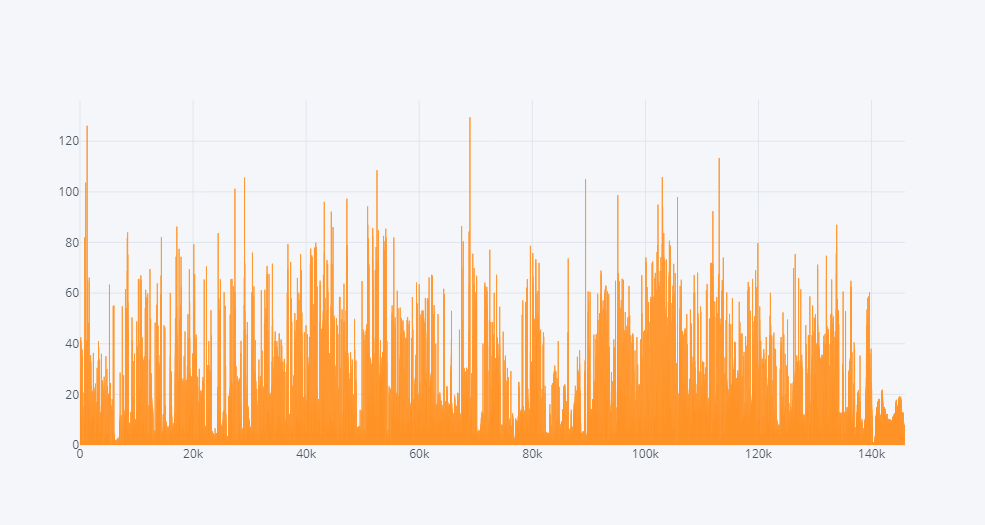

In [23]:
# visual_features['delta_hue'].iplot(kind='bar')
Image("plots/visual_hue.png")

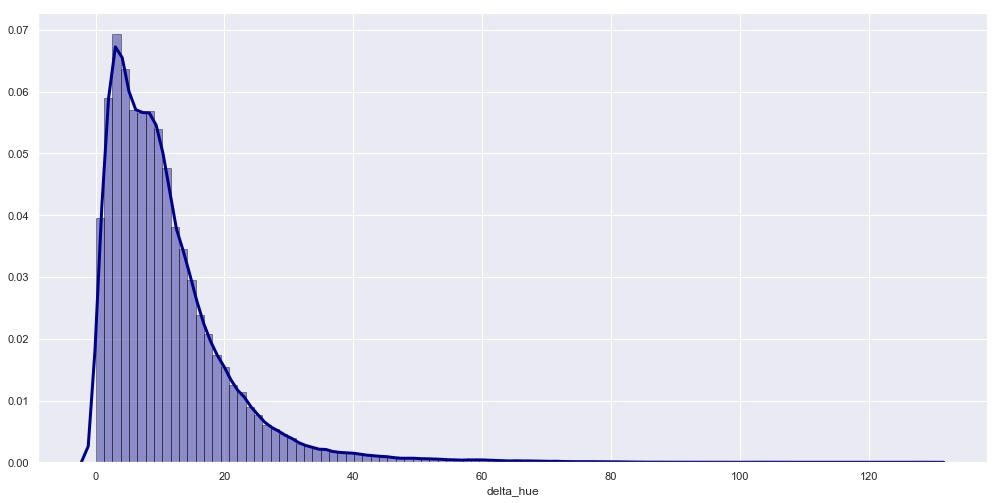

In [24]:
# Density Plot
sns.distplot(visual_features['delta_hue'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Saturation (Насиченість) (S)

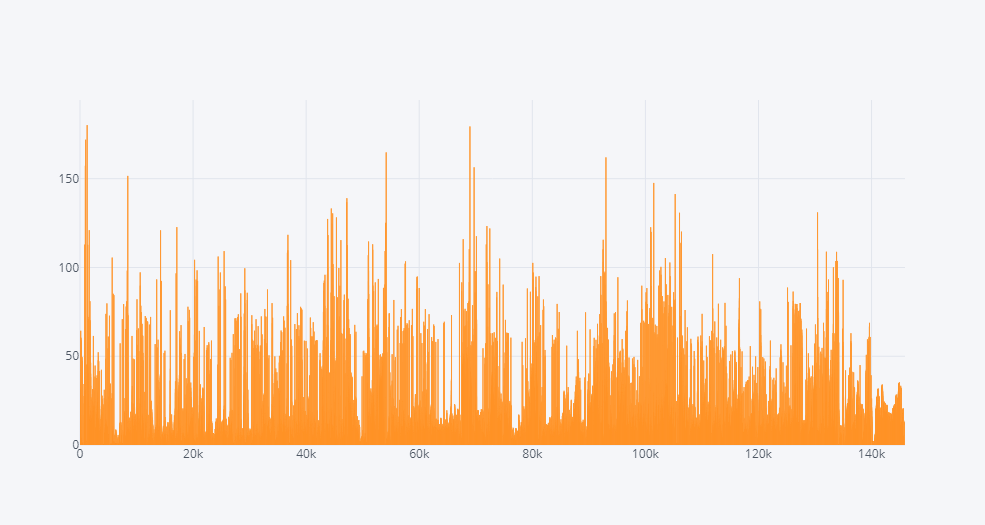

In [25]:
# visual_features['delta_sat'].iplot(kind='bar')
Image("plots/visual_saturation.png")

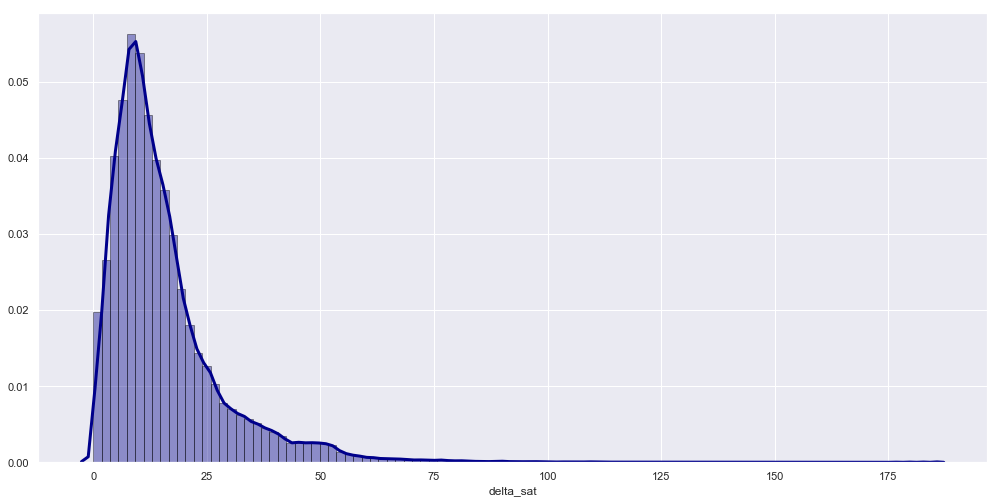

In [26]:
# Density Plot
sns.distplot(visual_features['delta_sat'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Value / Lightness (V, L)

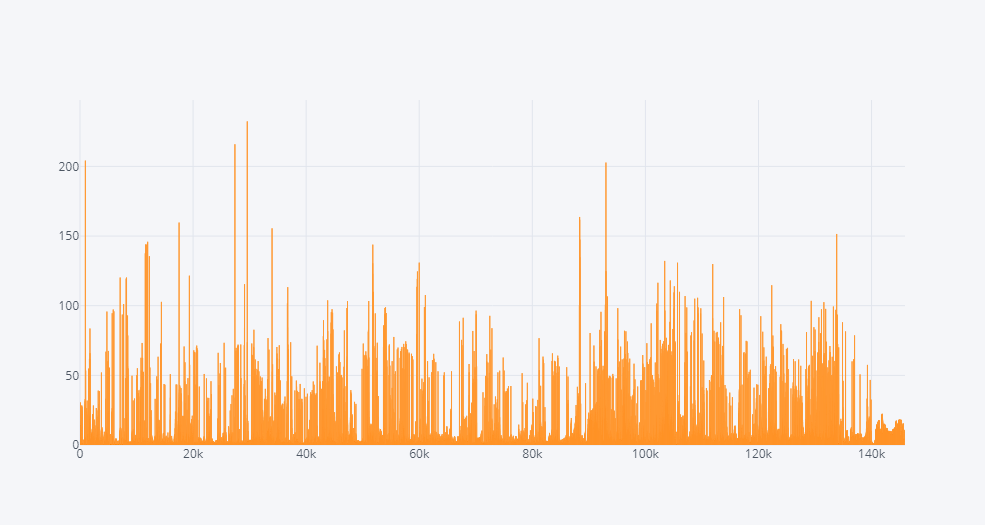

In [27]:
# visual_features['delta_lum'].iplot(kind='bar')
Image("plots/visual_value.png")

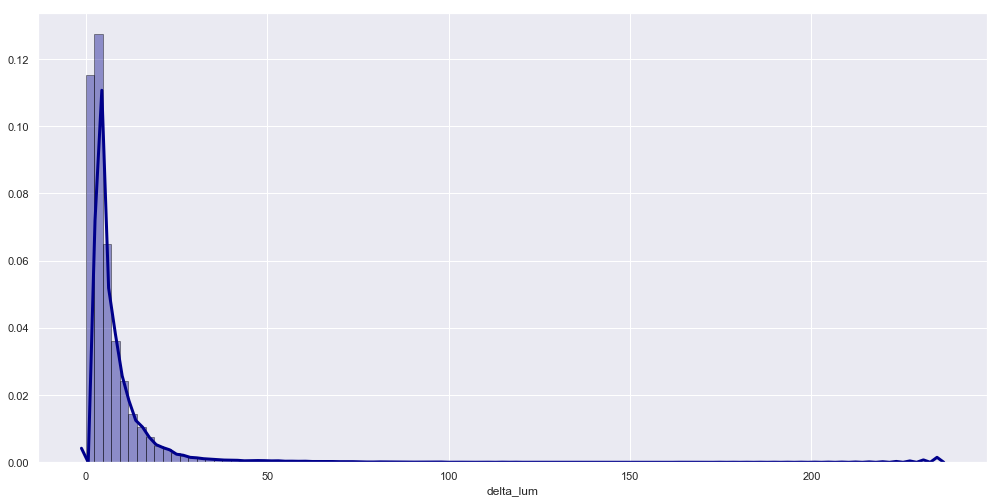

In [28]:
# Density Plot
sns.distplot(visual_features['delta_lum'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Content value (mean between HSV / HSL)

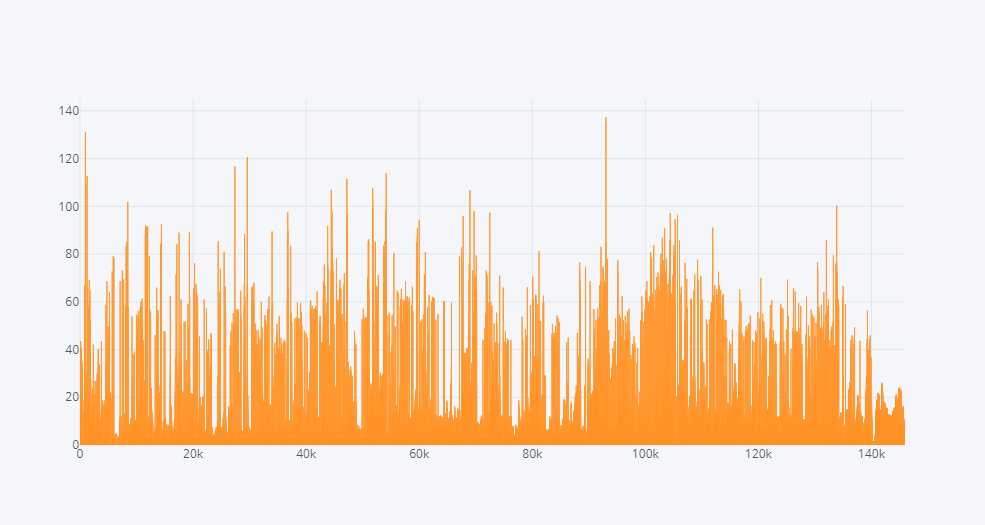

In [29]:
# visual_features['content_val'].iplot(kind='bar')
Image("plots/visual_content_value.png")

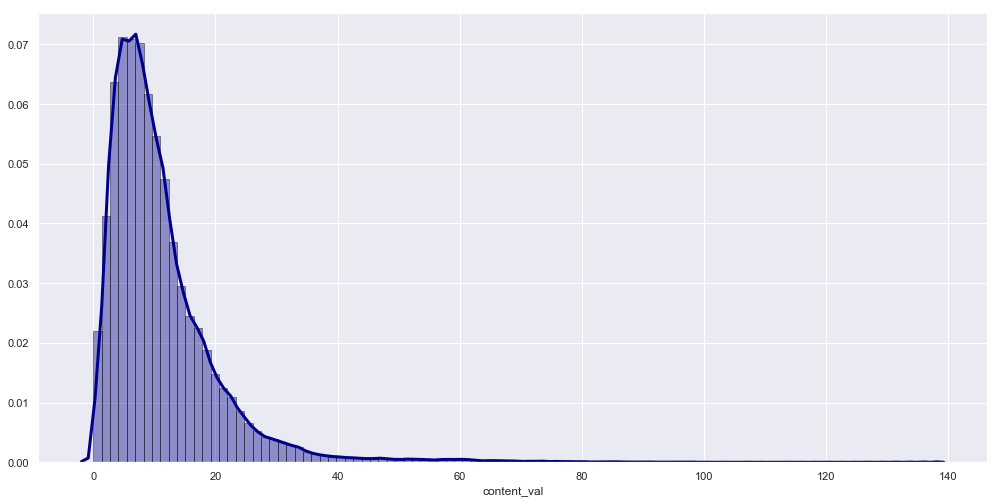

In [30]:
# Density Plot
sns.distplot(visual_features['content_val'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Number of people

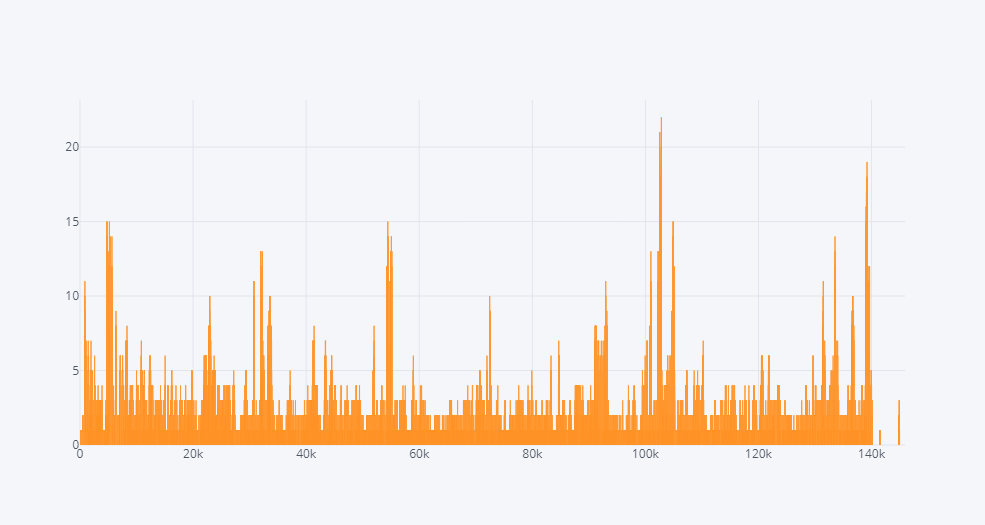

In [31]:
# visual_features['num_people'].iplot(kind='bar')
Image("plots/visual_num_people.png")

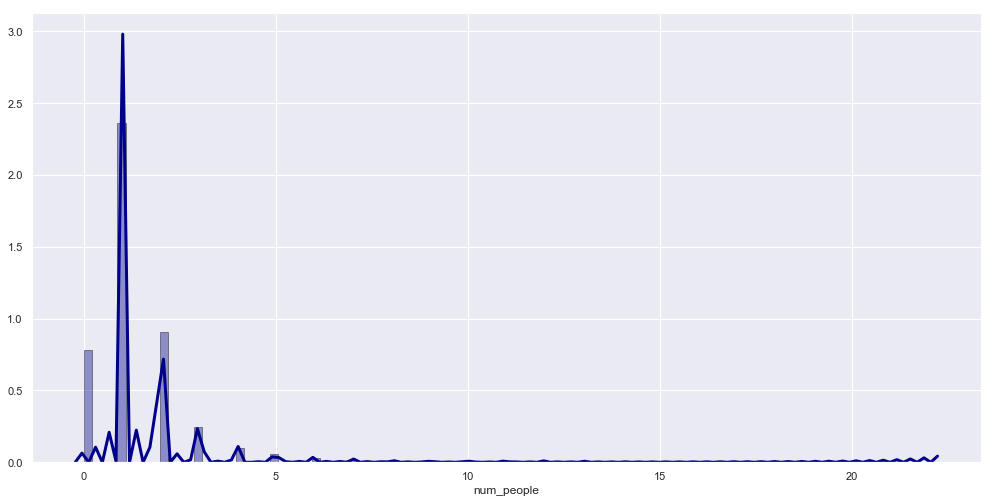

In [32]:
# Density Plot
sns.distplot(visual_features['num_people'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Number of non-people

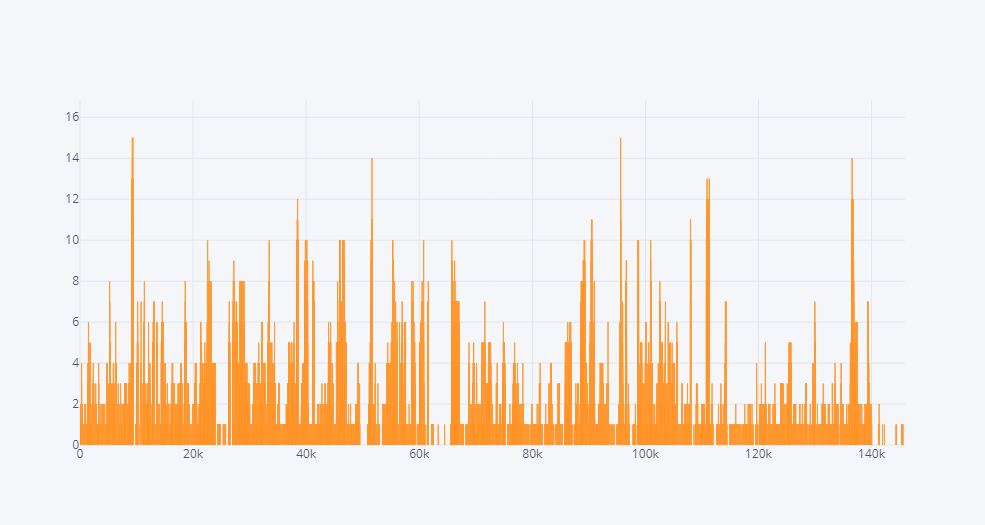

In [33]:
# visual_features['num_non_people'].iplot(kind='bar')
Image("plots/visual_num_non_people.png")

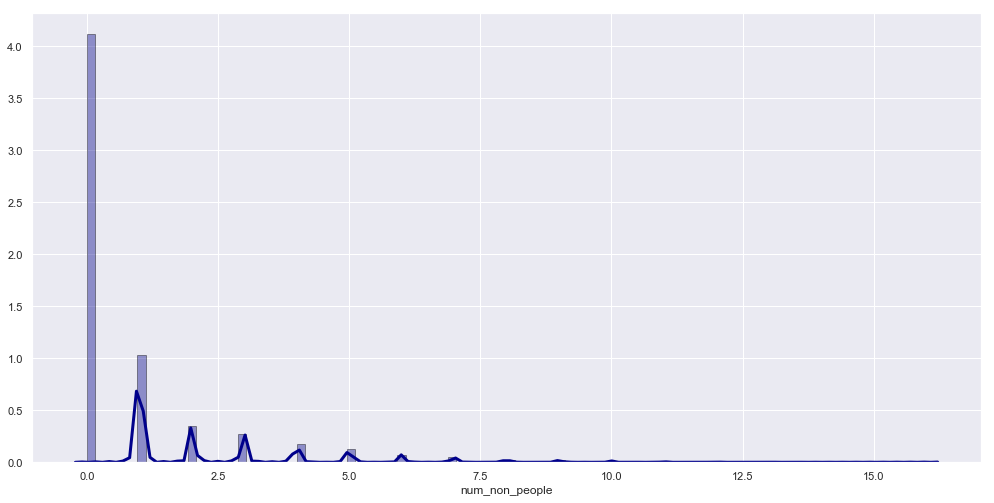

In [34]:
# Density Plot
sns.distplot(visual_features['num_non_people'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Number of total detected objects

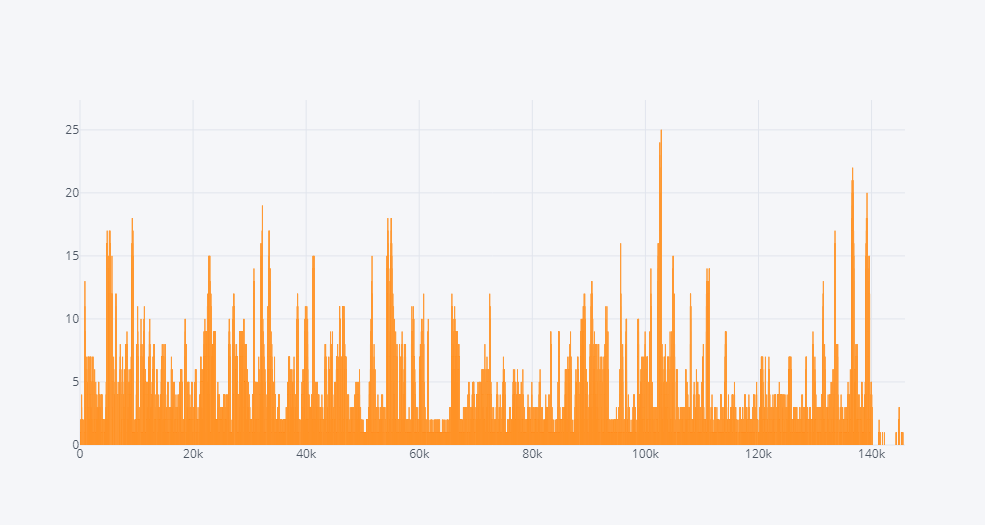

In [35]:
# visual_features['num_total_objects'].iplot(kind='bar')
Image("plots/visual_num_total_objects.png")

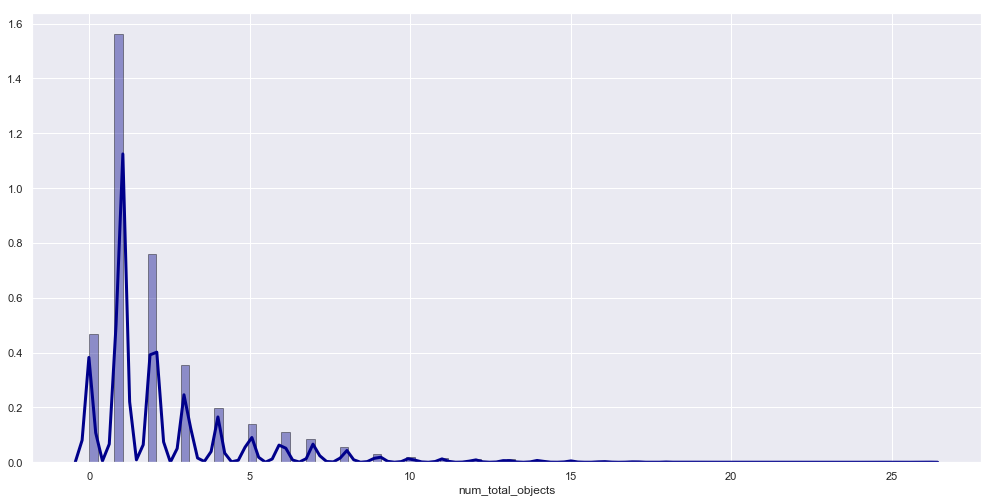

In [36]:
# Density Plot
sns.distplot(visual_features['num_total_objects'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Area of people

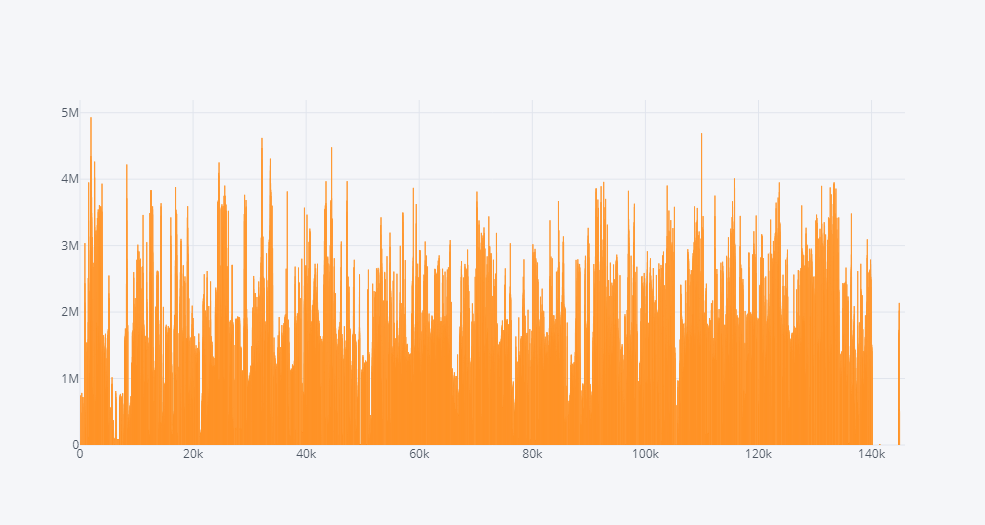

In [37]:
# visual_features['area_people'].iplot(kind='bar')
Image("plots/visual_area_people.png")

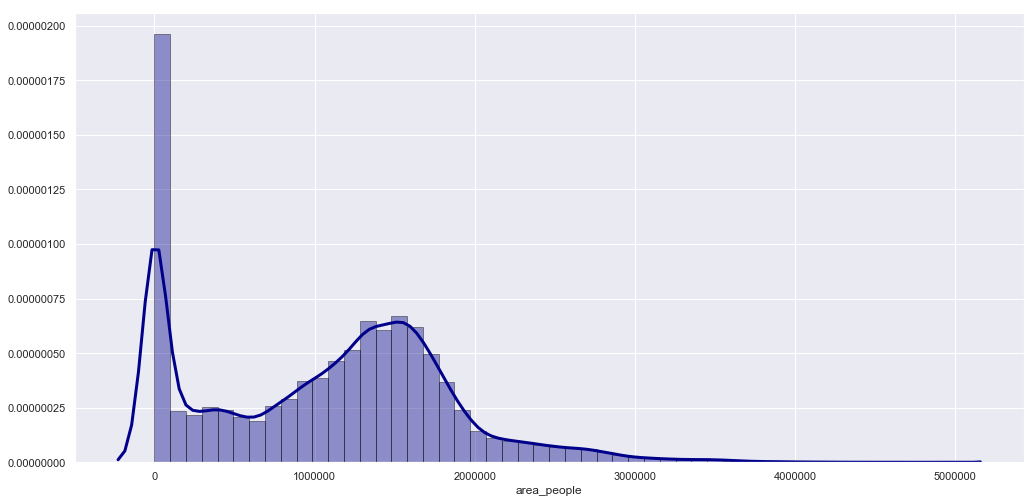

In [38]:
# Density Plot
sns.distplot(visual_features['area_people'], hist=True, kde=True, 
             bins=50,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Area of non-people

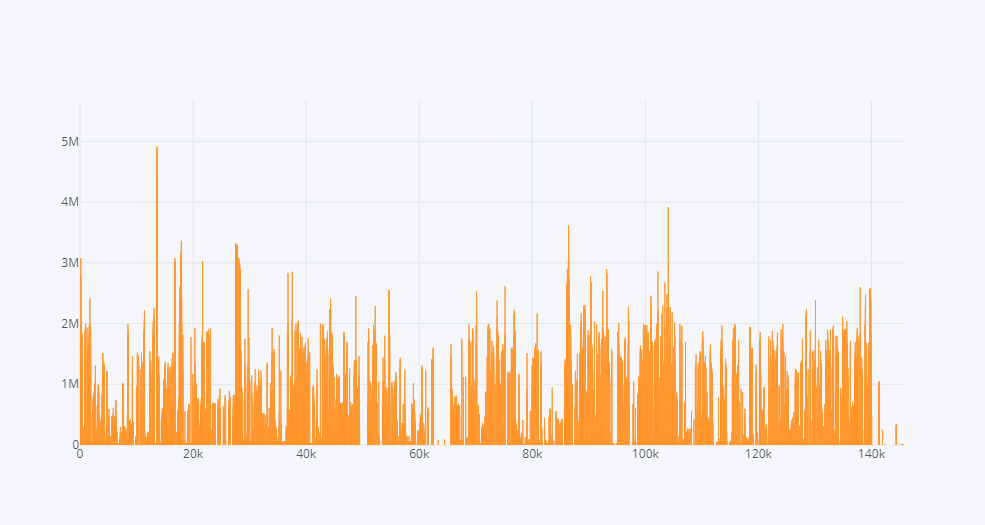

In [39]:
# visual_features['area_non_people'].iplot(kind='bar')
Image("plots/visual_area_non_people.png")

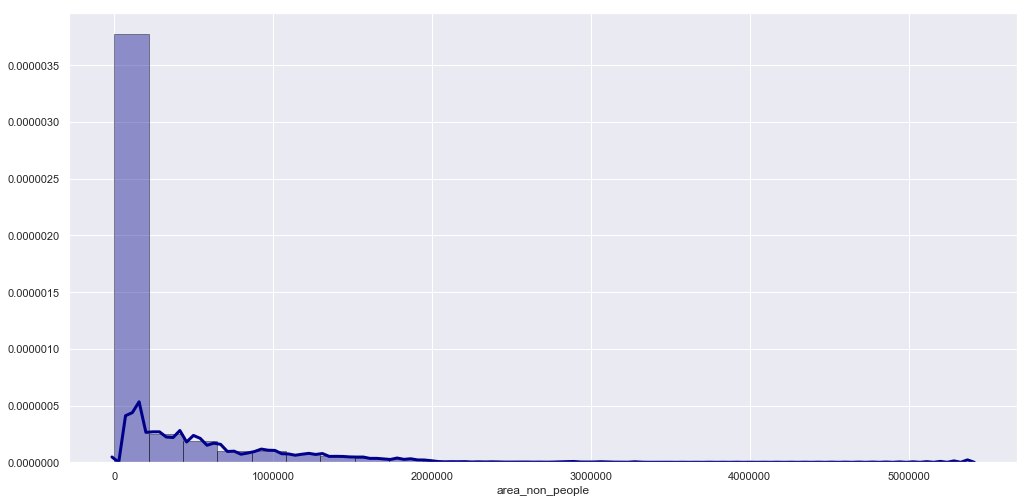

In [40]:
# Density Plot
sns.distplot(visual_features['area_non_people'], hist=True, kde=True, 
             bins=25,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

### Total area of detected objects

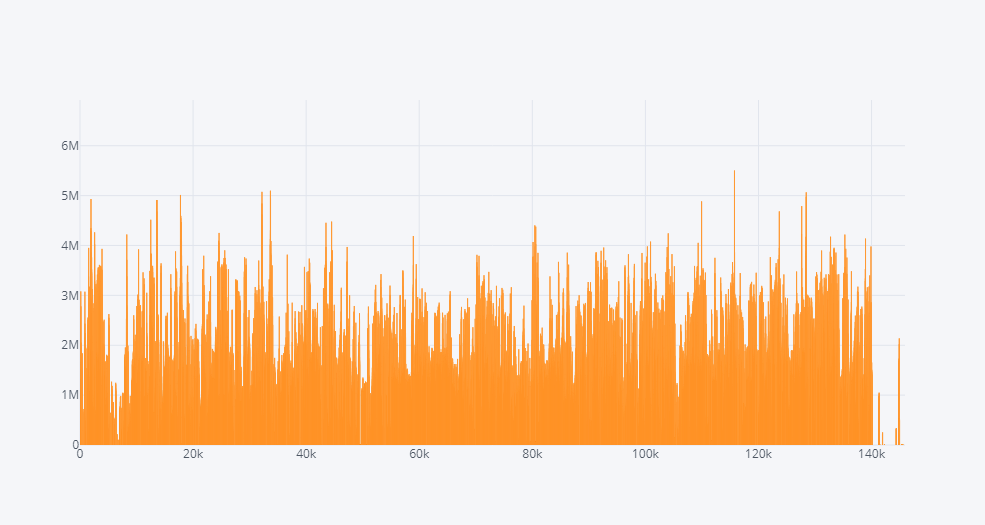

In [41]:
# visual_features['area_total_objects'].iplot(kind='bar')
Image("plots/visual_area_total_objects.png")

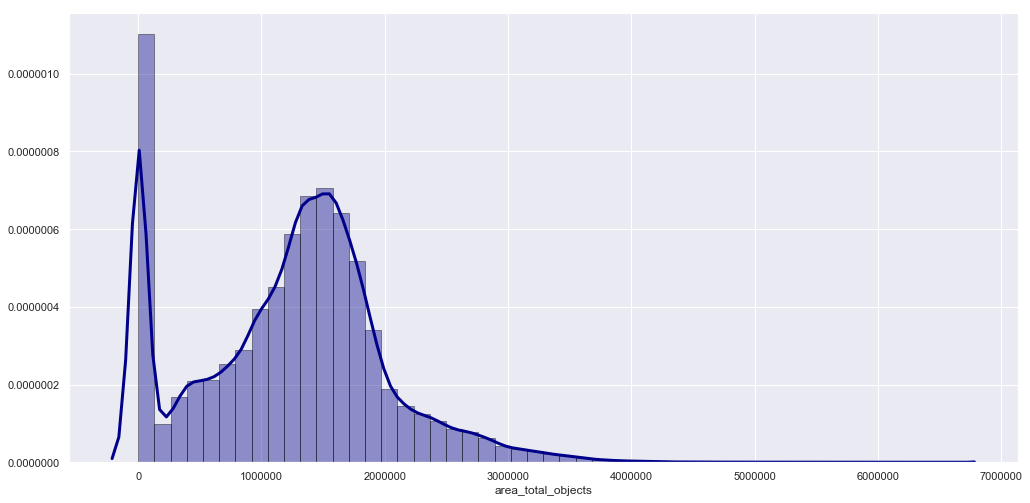

In [42]:
# Density Plot
sns.distplot(visual_features['area_total_objects'], hist=True, kde=True, 
             bins=50,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

## All visual features together

In [43]:
def show_images(images, cols = 2, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
#         a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        a = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title, fontdict={'fontsize': 18})
        a.axis('off')
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     plt.tight_layout()
    if cols == 3:
        plt.subplots_adjust(wspace=0.2, hspace=0.2, left=0.1, right=0.2, bottom=0.1, top=0.275)
    else:
        plt.subplots_adjust(wspace=0.2, hspace=0.2, left=0.15, right=0.2, bottom=0.1, top=0.275)
    plt.show()

In [44]:
all_visual_images = []
all_visual_titles = []

for image_path in glob.glob("plots/*.png"):
    if image_path.startswith('visual'):
        image = misc.imread(image_path)
        all_visual_images.append(image)
        all_visual_titles.append(image_path.split('\\')[1].split('.')[0])

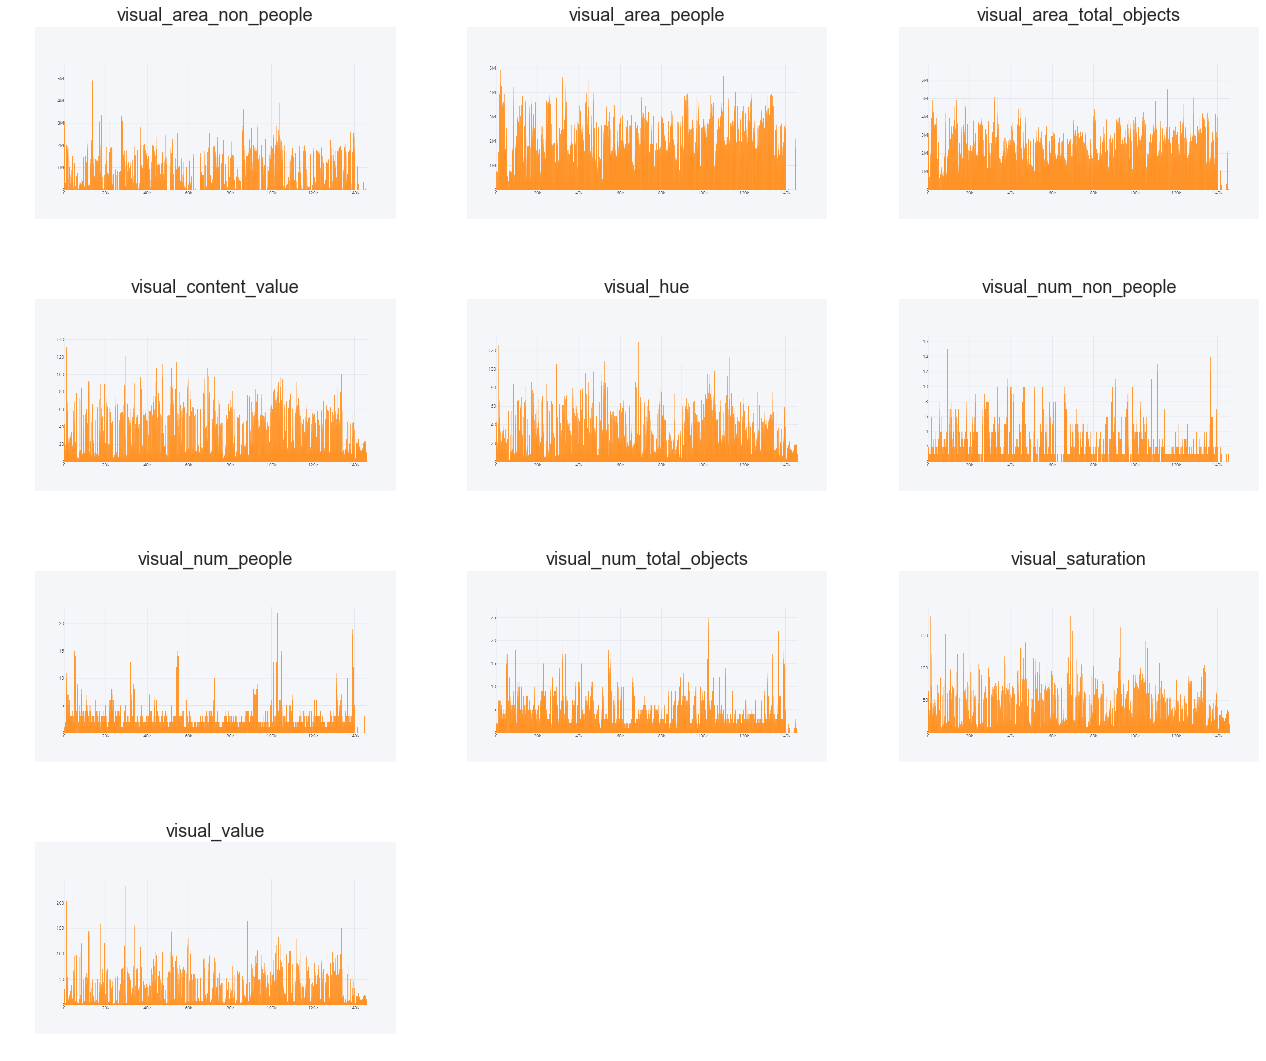

In [45]:
show_images(all_visual_images, cols=3, titles=all_visual_titles)

### Visual features correlation matrix

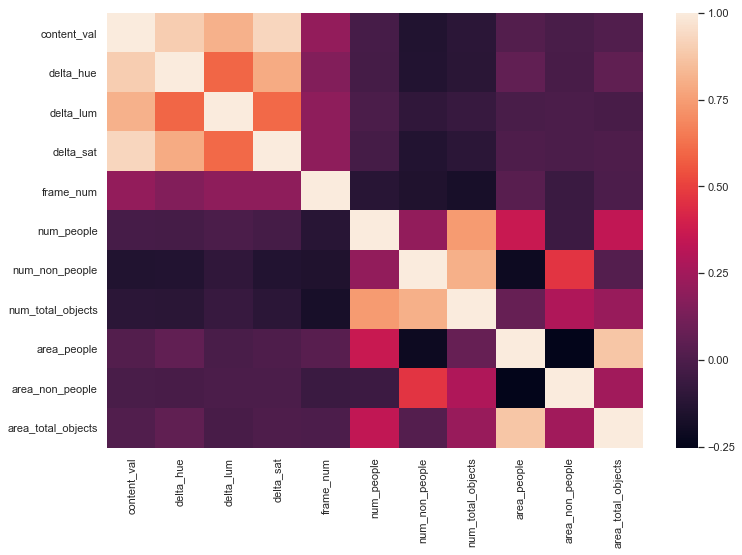

In [133]:
_, ax_visual = plt.subplots(figsize=(12, 8))
visual_corr = visual_features.corr()
sns.heatmap(visual_corr, 
            xticklabels=visual_corr.columns.values,
            yticklabels=visual_corr.columns.values,
            ax=ax_visual);

In [22]:
# visual_features.iplot(kind='histogram', subplots=True, shape=(11, 1))

In [23]:
# data = [
#     go.Bar(
#         x=all_features['frame_num'], # assign x as the dataframe column 'x'
#         y=all_features['num_people']
#     )
# ]

# # IPython notebook
# py.iplot(data)

## Audio Features

In [47]:
path_to_short_audio_features = 'audio_features/extracted_features/requiem_audio_short_features.csv'
path_to_mid_audio_features = 'audio_features/extracted_features/requiem_audio_mid_features.csv'

short_term_features = pd.read_csv(path_to_short_audio_features)
mid_term_features = pd.read_csv(path_to_mid_audio_features)

In [48]:
short_term_features.head()

zcr        energy  energy_entropy  spectral_centroid  spectral_spread  \
0  0.0  1.281182e-09        3.311029           0.000907     1.190891e-08   
1  0.0  1.281182e-09        3.311029           0.000907     1.190891e-08   
2  0.0  1.281182e-09        3.311029           0.000907     1.190891e-08   
3  0.0  1.281182e-09        3.311029           0.000907     1.190891e-08   
4  0.0  1.281182e-09        3.311029           0.000907     1.190891e-08   

   spectral_entropy  spectral_flux  spectral_rolloff     mfcc_1        mfcc_2  \
0          0.529062            0.0               0.0 -50.596443  3.829444e-15   
1          0.529062            0.0               0.0 -50.596443  3.829444e-15   
2          0.529062            0.0               0.0 -50.596443  3.829444e-15   
3          0.529062            0.0               0.0 -50.596443  3.829444e-15   
4          0.529062            0.0               0.0 -50.596443  3.829444e-15   

      ...          chroma_4  chroma_5      chroma_6      chroma_7  \
0     ...      5.362805e-35  0.166667  3.880342e-33  2.509591e-33   
1     ...      5.362805e-35  0.166667  3.880342e-33  2.509591e-33   
2     ...      5.362805e-35  0.166667  3.880342e-33  2.509591e-33   
3     ...      5.362805e-35  0.166667  3.880342e-33  2.509591e-33   
4     ...      5.362805e-35  0.166667  3.880342e-33  2.509591e-33   

       chroma_8      chroma_9     chroma_10     chroma_11     chroma_12  \
0  5.388474e-36  5.515205e-35  2.726859e-35  3.670209e-34  8.322730e-35   
1  5.388474e-36  5.515205e-35  2.726859e-35  3.670209e-34  8.322730e-35   
2  5.388474e-36  5.515205e-35  2.726859e-35  3.670209e-34  8.322730e-35   
3  5.388474e-36  5.515205e-35  2.726859e-35  3.670209e-34  8.322730e-35   
4  5.388474e-36  5.515205e-35  2.726859e-35  3.670209e-34  8.322730e-35   

   chroma_std  
0    0.046064  
1    0.046064  
2    0.046064  
3    0.046064  
4    0.046064  

[5 rows x 34 columns]

In [82]:
short_term_features.columns

Index(['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std'],
      dtype='object')

In [49]:
mid_term_features.head()

zcr_mean   energy_mean  energy_entropy_mean  spectral_centroid_mean  \
0       0.0  1.281182e-09             3.311029                0.000907   
1       0.0  1.281182e-09             3.311029                0.000907   
2       0.0  1.281182e-09             3.311029                0.000907   
3       0.0  1.281182e-09             3.311029                0.000907   
4       0.0  1.281182e-09             3.311029                0.000907   

   spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
0          1.190891e-08               0.529062                 0.0   
1          1.190891e-08               0.529062                 0.0   
2          1.190891e-08               0.529062                 0.0   
3          1.190891e-08               0.529062                 0.0   
4          1.190891e-08               0.529062                 0.0   

   spectral_rolloff_mean  mfcc_1_mean   mfcc_2_mean       ...        \
0                    0.0   -50.596443  3.829444e-15       ...         
1                    0.0   -50.596443  3.829444e-15       ...         
2                    0.0   -50.596443  3.829444e-15       ...         
3                    0.0   -50.596443  3.829444e-15       ...         
4                    0.0   -50.596443  3.829444e-15       ...         

   chroma_4_std  chroma_5_std  chroma_6_std  chroma_7_std  chroma_8_std  \
0  1.069106e-50  2.775558e-17  6.842278e-49  3.421139e-49  1.336382e-51   
1  1.069106e-50  2.775558e-17  6.842278e-49  3.421139e-49  1.336382e-51   
2  1.069106e-50  2.775558e-17  6.842278e-49  3.421139e-49  1.336382e-51   
3  1.069106e-50  2.775558e-17  6.842278e-49  3.421139e-49  1.336382e-51   
4  1.069106e-50  2.775558e-17  6.842278e-49  3.421139e-49  1.336382e-51   

   chroma_9_std  chroma_10_std  chroma_11_std  chroma_12_std  chroma_std_std  
0  1.069106e-50   5.345529e-51            0.0   1.069106e-50    6.938894e-18  
1  1.069106e-50   5.345529e-51            0.0   1.069106e-50    6.938894e-18  
2  1.069106e-50   5.345529e-51            0.0   1.069106e-50    6.938894e-18  
3  1.069106e-50   5.345529e-51            0.0   1.069106e-50    6.938894e-18  
4  1.069106e-50   5.345529e-51            0.0   1.069106e-50    6.938894e-18  

[5 rows x 68 columns]

In [50]:
short_term_features.describe()

zcr        energy  energy_entropy  spectral_centroid  \
count  121718.000000  1.217180e+05   121718.000000      121718.000000   
mean        0.056727  1.496727e-03        3.099022           0.131365   
std         0.054135  5.357937e-03        0.253977           0.057201   
min         0.000000  1.281182e-09        0.032651           0.000907   
25%         0.025862  1.230275e-05        3.050016           0.095834   
50%         0.043557  9.302516e-05        3.175367           0.119065   
75%         0.068058  7.894463e-04        3.244894           0.151087   
max         0.740472  1.585342e-01        3.321580           0.640875   

       spectral_spread  spectral_entropy  spectral_flux  spectral_rolloff  \
count     1.217180e+05     121718.000000  121718.000000     121718.000000   
mean      1.712307e-01          0.431750       0.007791          0.080416   
std       4.417779e-02          0.480069       0.009698          0.097297   
min       1.190891e-08          0.000076       0.000000          0.000000   
25%       1.415434e-01          0.092406       0.003072          0.022686   
50%       1.688905e-01          0.258174       0.004963          0.048094   
75%       1.977010e-01          0.585235       0.009037          0.099819   
max       3.405156e-01          2.944659       0.677951          0.752269   

              mfcc_1         mfcc_2      ...            chroma_4  \
count  121718.000000  121718.000000      ...        1.217180e+05   
mean      -31.515915       1.928441      ...        1.366914e-02   
std         4.275045       1.038868      ...        2.490909e-02   
min       -50.596443      -3.420946      ...        5.362805e-35   
25%       -34.388431       1.294043      ...        2.031947e-03   
50%       -31.630734       2.018953      ...        5.179972e-03   
75%       -28.308691       2.627833      ...        1.344183e-02   
max       -20.099663       6.017826      ...        3.165505e-01   

            chroma_5      chroma_6      chroma_7      chroma_8      chroma_9  \
count  121718.000000  1.217180e+05  1.217180e+05  1.217180e+05  1.217180e+05   
mean        0.020974  1.259394e-02  4.618046e-02  3.082064e-03  8.068396e-03   
std         0.031591  2.054400e-02  6.486414e-02  8.678474e-03  1.637716e-02   
min         0.000011  3.880342e-33  2.509591e-33  5.388474e-36  5.515205e-35   
25%         0.004293  2.075921e-03  8.122606e-03  2.696095e-04  1.231707e-03   
50%         0.009757  5.553133e-03  2.185163e-02  8.472055e-04  3.145882e-03   
75%         0.023141  1.396882e-02  5.500104e-02  2.515930e-03  7.546238e-03   
max         0.328968  3.211736e-01  4.758202e-01  2.530182e-01  2.485854e-01   

          chroma_10     chroma_11     chroma_12     chroma_std  
count  1.217180e+05  1.217180e+05  1.217180e+05  121718.000000  
mean   1.410375e-02  2.314339e-02  8.765510e-03       0.028068  
std    2.015999e-02  2.989553e-02  1.882851e-02       0.019663  
min    2.726859e-35  3.670209e-34  8.322730e-35       0.000138  
25%    3.008054e-03  5.562727e-03  9.593356e-04       0.014008  
50%    7.068457e-03  1.316520e-02  2.672329e-03       0.023702  
75%    1.638643e-02  2.833086e-02  7.377691e-03       0.036929  
max    2.542464e-01  3.058394e-01  2.202081e-01       0.131242  

[8 rows x 34 columns]

In [51]:
mid_term_features.describe()

zcr_mean   energy_mean  energy_entropy_mean  spectral_centroid_mean  \
count  6086.000000  6.086000e+03          6086.000000             6086.000000   
mean      0.056730  1.496703e-03             3.099025                0.131368   
std       0.041868  4.470120e-03             0.115516                0.045658   
min       0.000000  1.281182e-09             2.305300                0.000907   
25%       0.034074  3.075312e-05             3.034786                0.104483   
50%       0.049308  1.984016e-04             3.117439                0.120630   
75%       0.066674  1.020451e-03             3.182570                0.144154   
max       0.685776  5.663604e-02             3.317981                0.569176   

       spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
count          6.086000e+03            6086.000000         6086.000000   
mean           1.712327e-01               0.431767            0.007791   
std            3.407221e-02               0.351566            0.004906   
min            1.190891e-08               0.005187            0.000000   
25%            1.493536e-01               0.189640            0.004380   
50%            1.655944e-01               0.364181            0.006432   
75%            1.873863e-01               0.568658            0.009949   
max            3.020711e-01               2.710642            0.047002   

       spectral_rolloff_mean  mfcc_1_mean  mfcc_2_mean       ...        \
count            6086.000000  6086.000000  6086.000000       ...         
mean                0.080415   -31.516088     1.928429       ...         
std                 0.072694     3.950035     0.827178       ...         
min                 0.000000   -50.596443    -2.212439       ...         
25%                 0.039564   -34.082282     1.444895       ...         
50%                 0.065358   -31.727607     1.993101       ...         
75%                 0.099036   -28.778220     2.456951       ...         
max                 0.745100   -21.336120     4.557034       ...         

       chroma_4_std  chroma_5_std  chroma_6_std  chroma_7_std  chroma_8_std  \
count  6.086000e+03  6.086000e+03  6.086000e+03  6.086000e+03  6.086000e+03   
mean   1.385260e-02  1.681795e-02  1.294017e-02  3.541571e-02  4.091108e-03   
std    1.430321e-02  1.467782e-02  1.186254e-02  3.048378e-02  6.350112e-03   
min    1.069106e-50  2.775558e-17  6.842278e-49  3.421139e-49  1.336382e-51   
25%    4.195020e-03  6.547422e-03  4.741098e-03  1.427657e-02  7.496673e-04   
50%    8.782060e-03  1.260685e-02  9.089472e-03  2.685011e-02  1.890771e-03   
75%    1.800122e-02  2.238763e-02  1.768799e-02  4.456593e-02  4.384583e-03   
max    9.822312e-02  1.266882e-01  1.091923e-01  1.797139e-01  7.571973e-02   

       chroma_9_std  chroma_10_std  chroma_11_std  chroma_12_std  \
count  6.086000e+03   6.086000e+03    6086.000000   6.086000e+03   
mean   8.662707e-03   1.298305e-02       0.018835   8.968386e-03   
std    9.853850e-03   1.050448e-02       0.013777   1.086926e-02   
min    1.069106e-50   5.345529e-51       0.000000   1.069106e-50   
25%    2.613220e-03   5.490357e-03       0.009235   2.102646e-03   
50%    5.146341e-03   1.004782e-02       0.015474   4.661133e-03   
75%    1.062181e-02   1.753421e-02       0.024561   1.121076e-02   
max    7.108648e-02   8.118550e-02       0.115228   7.110411e-02   

       chroma_std_std  
count    6.086000e+03  
mean     1.218048e-02  
std      6.606252e-03  
min      6.938894e-18  
25%      7.621971e-03  
50%      1.093645e-02  
75%      1.507337e-02  
max      4.654598e-02  

[8 rows x 68 columns]

In [52]:
if not os.path.exists('plots'):
    os.mkdir('plots')

### Zero Crossing Rate

The rate of sign-changes of the signal during the duration of a particular frame.

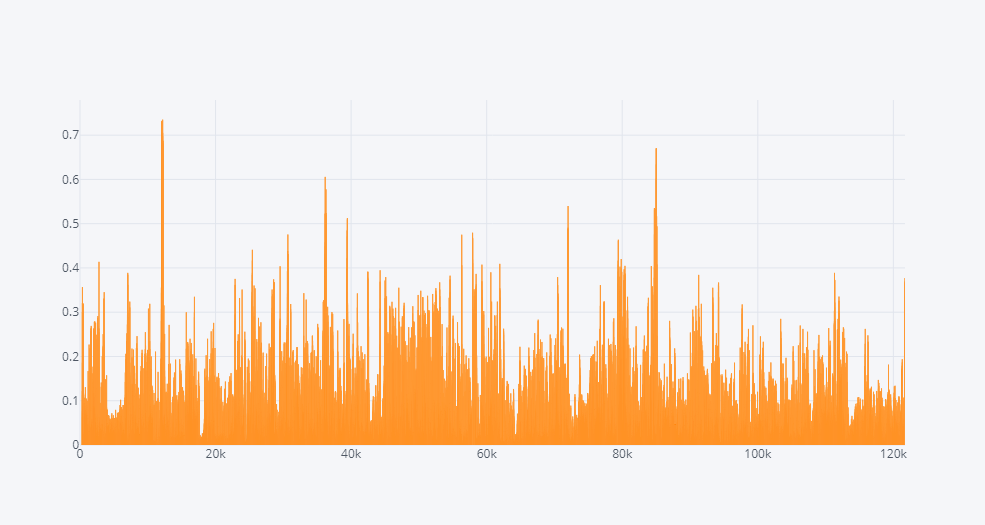

In [57]:
# short_term_features['zcr'].iplot(kind='bar')
Image("plots/audio_zero_crossing_rate.png")

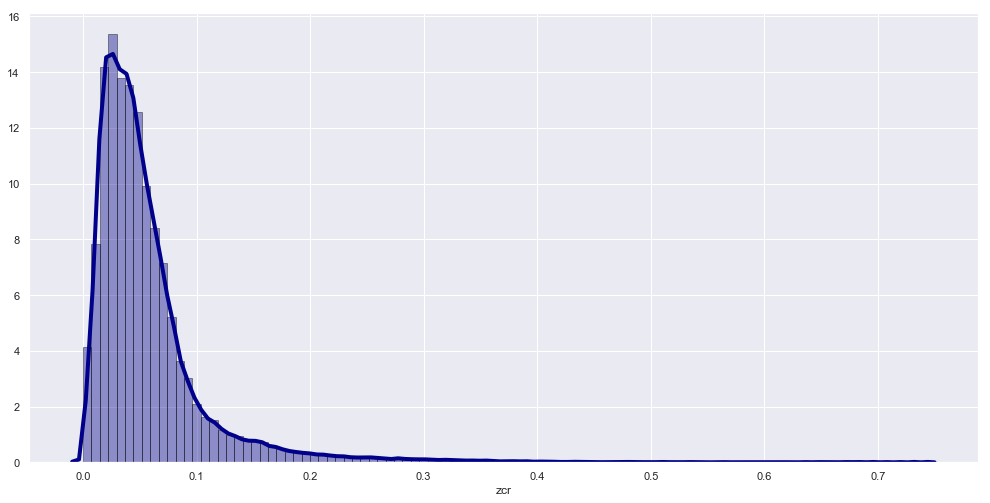

In [55]:
# Density Plot
sns.distplot(short_term_features['zcr'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Energy
The sum of squares of the signal values, normalized by the respective frame length.

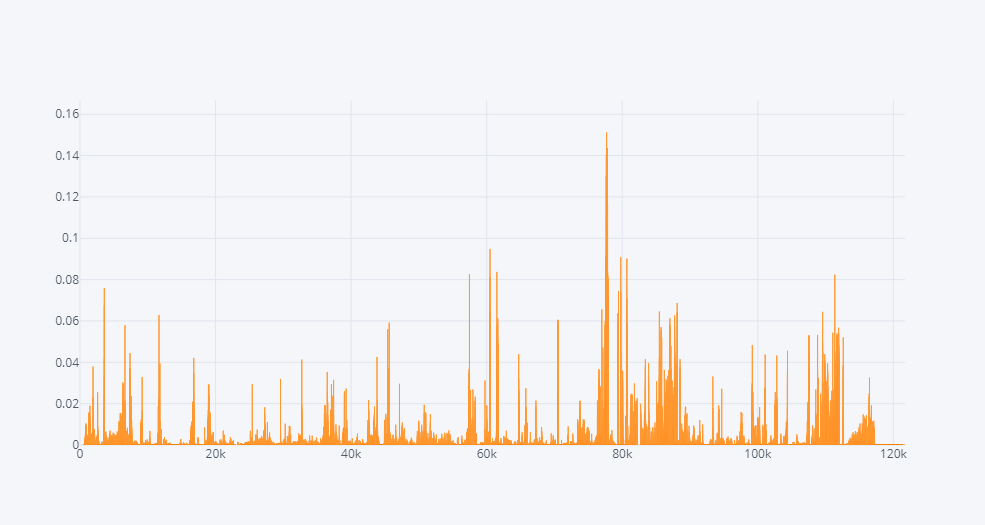

In [63]:
# short_term_features['energy'].iplot(kind='bar')
Image("plots/audio_energy.png")

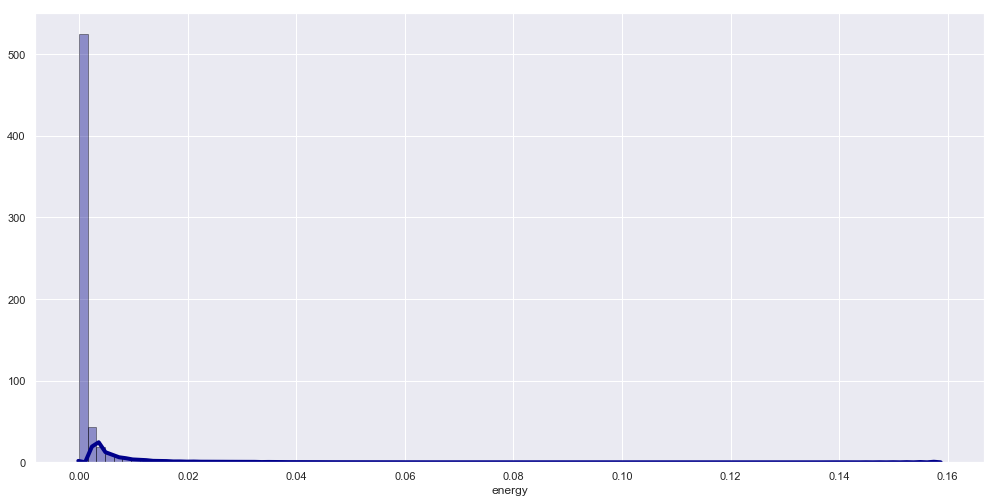

In [62]:
# Density Plot
sns.distplot(short_term_features['energy'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Energy entropy
The entropy of sub-frames' normalized energies. It can be interpreted as a measure of abrupt changes.

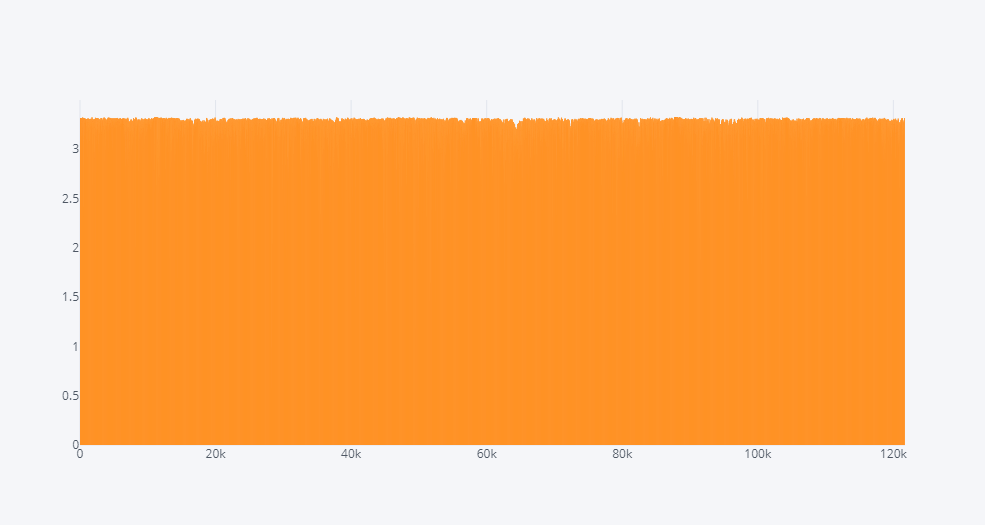

In [69]:
# short_term_features['energy_entropy'].iplot(kind='bar')
Image("plots/audio_energy_entropy.png")

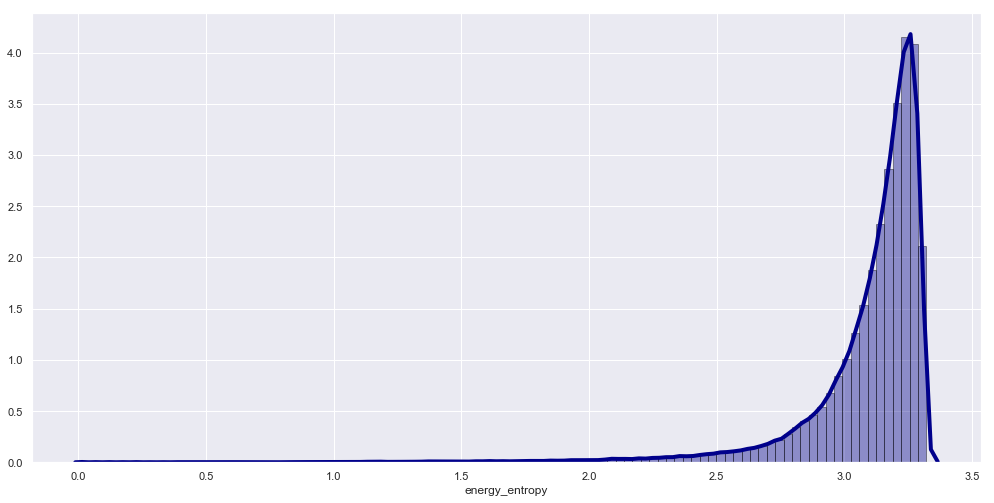

In [65]:
# Density Plot
sns.distplot(short_term_features['energy_entropy'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Spectral centroid
The center of gravity of the spectrum.

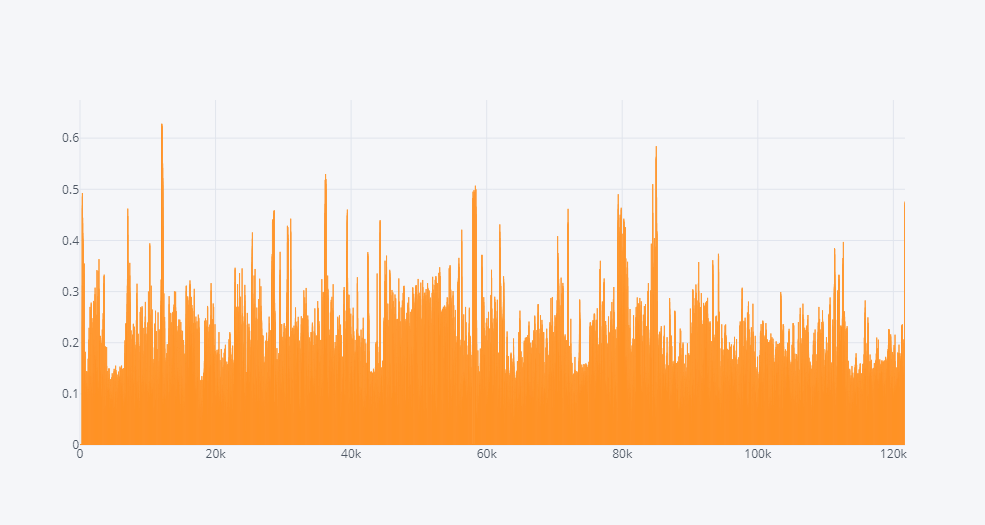

In [67]:
# short_term_features['spectral_centroid'].iplot(kind='bar')
Image("plots/audio_spectral_centroid.png")

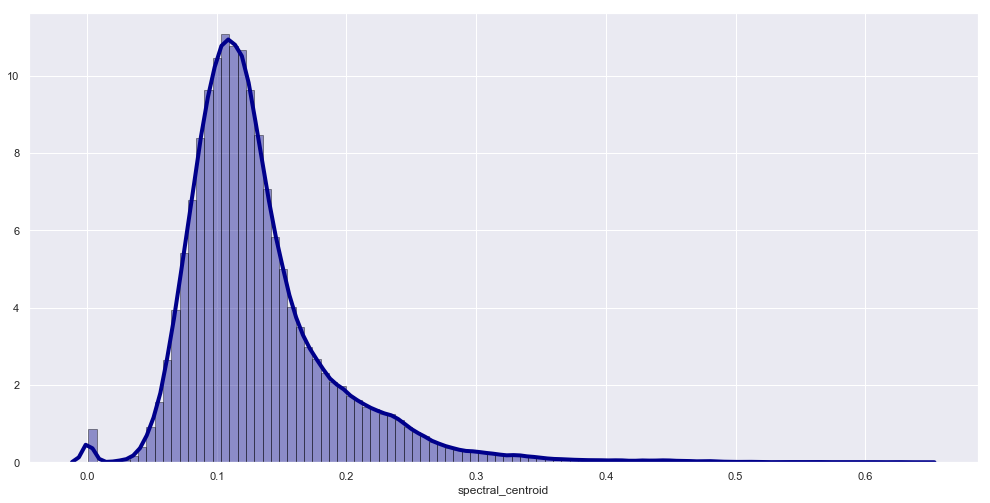

In [68]:
# Density Plot
sns.distplot(short_term_features['spectral_centroid'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Spectral spread
The second central moment of the spectrum.

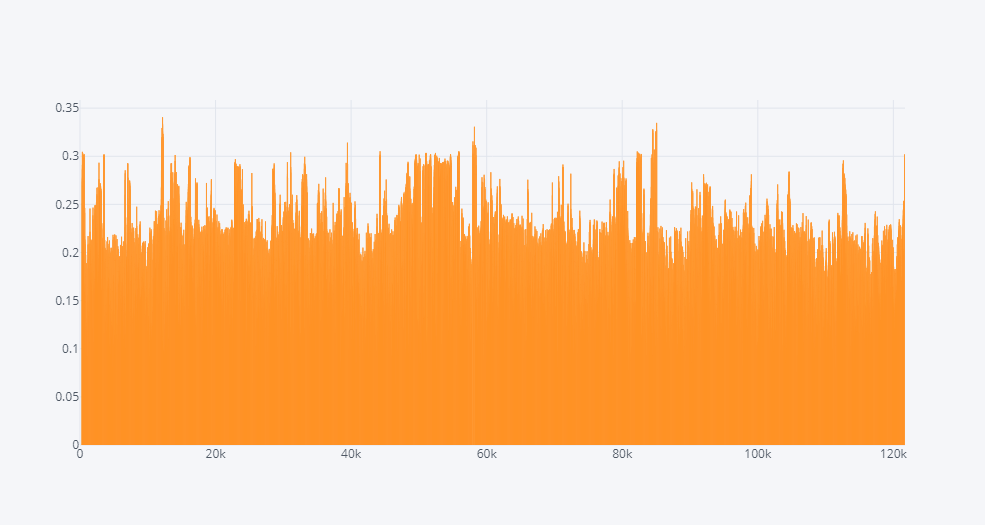

In [71]:
# short_term_features['spectral_spread'].iplot(kind='bar')
Image("plots/audio_spectral_spread.png")

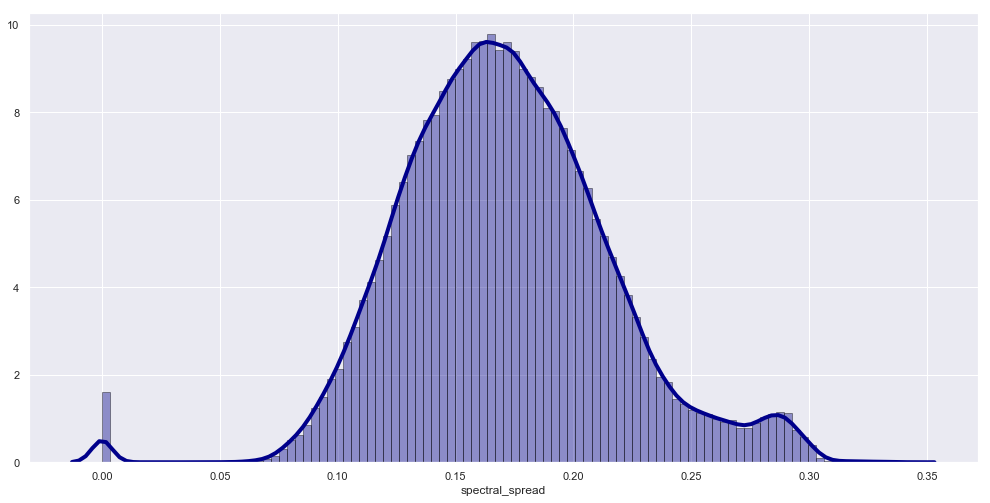

In [72]:
# Density Plot
sns.distplot(short_term_features['spectral_spread'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Spectral entropy
Entropy of the normalized spectral energies for a set of sub-frames.

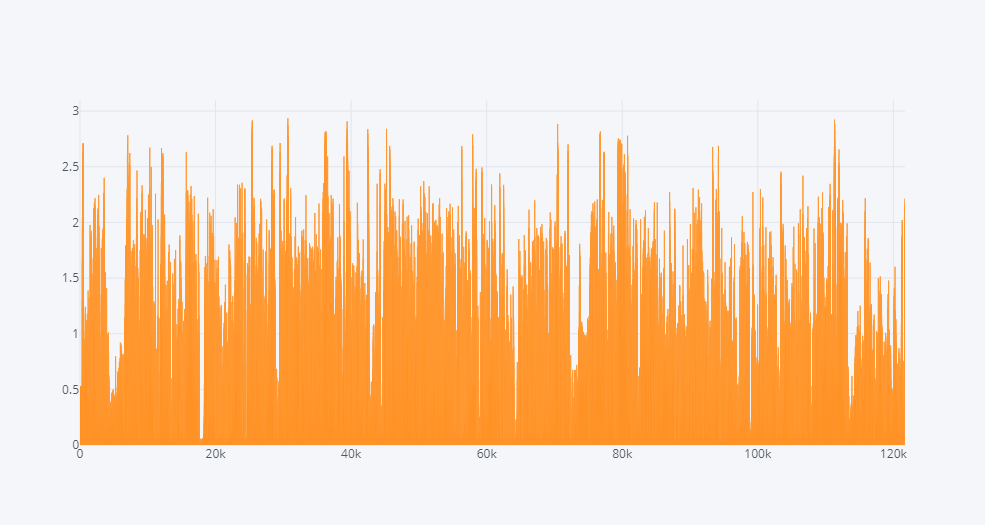

In [76]:
# short_term_features['spectral_entropy'].iplot(kind='bar')
Image("plots/audio_spectral_entropy.png")

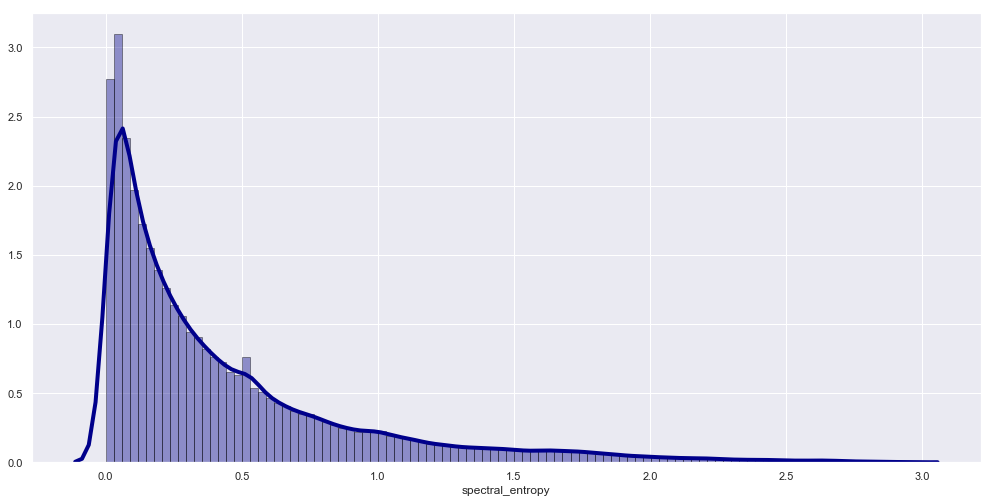

In [74]:
# Density Plot
sns.distplot(short_term_features['spectral_entropy'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Spectral flux
The squared difference between the normalized magnitudes of the spectra of the two successive frames.

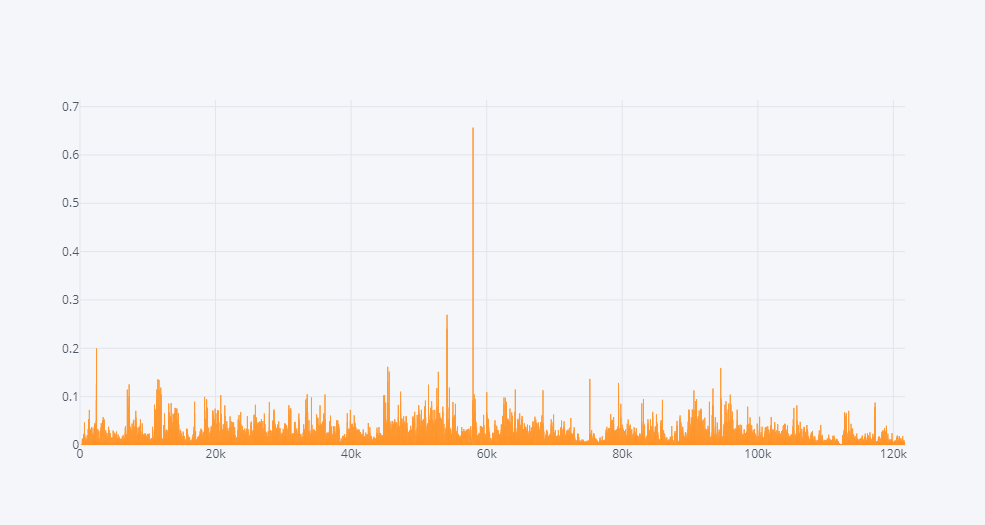

In [78]:
# short_term_features['spectral_flux'].iplot(kind='bar')
Image("plots/audio_spectral_flux.png")

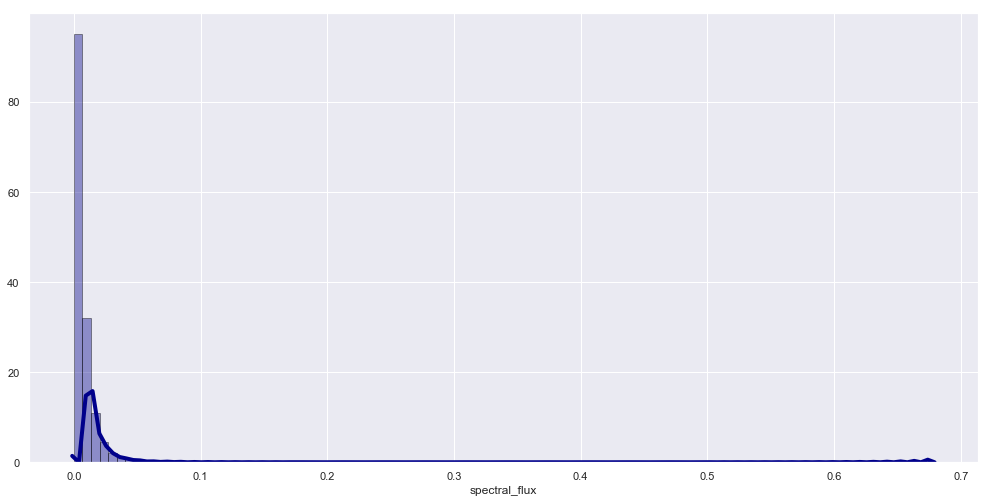

In [75]:
# Density Plot
sns.distplot(short_term_features['spectral_flux'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### Spectral rolloff
The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.

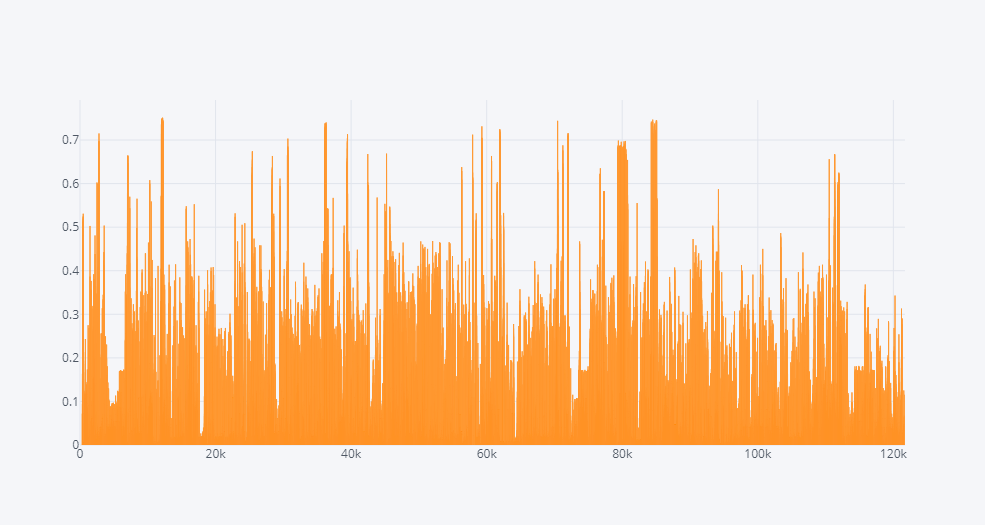

In [80]:
# short_term_features['spectral_rolloff'].iplot(kind='bar')
Image("plots/audio_spectral_rolloff.png")

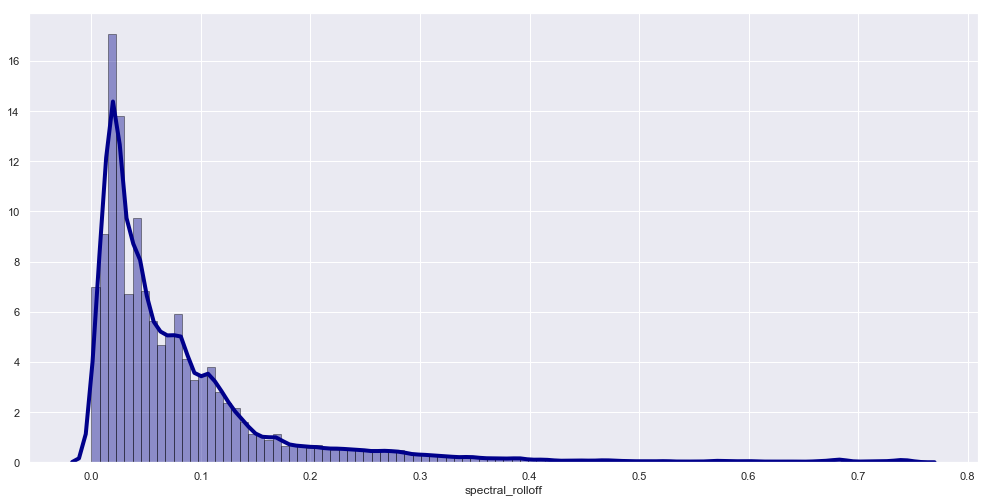

In [81]:
# Density Plot
sns.distplot(short_term_features['spectral_rolloff'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

### MFCCs (12-dimensional vector)
Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

In [ ]:
# short_term_features['zcr'].iplot(kind='bar')
# # Image("plots/")

In [ ]:
# # Density Plot
# sns.distplot(short_term_features['spectral_centroid'], hist=True, kde=True, 
#              bins=100,
#              color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4});

### Chroma Vector (12-dimensional vector)
A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

In [ ]:
# short_term_features['zcr'].iplot(kind='bar')
# # Image("plots/")

In [86]:
# # Density Plot
# sns.distplot(short_term_features['chroma_1'], hist=True, kde=True, 
#              bins=100,
#              color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4});

### Chroma Deviation
The standard deviation of the 12 chroma coefficients.

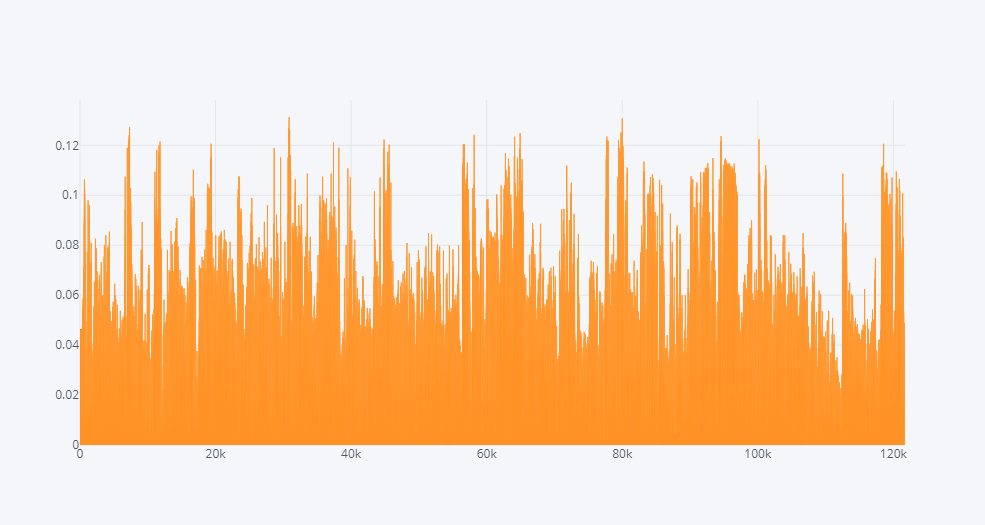

In [87]:
# short_term_features['chroma_std'].iplot(kind='bar')
Image("plots/audio_chroma_deviation.png")

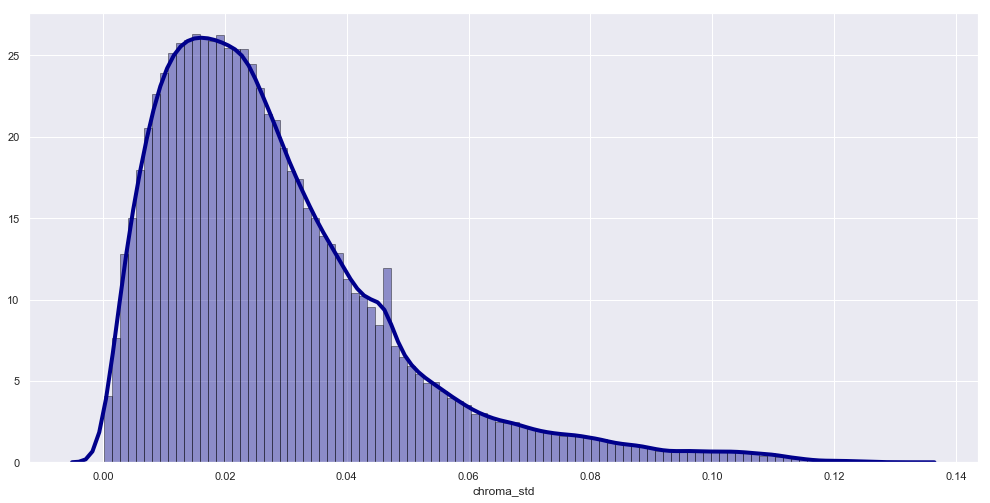

In [83]:
# Density Plot
sns.distplot(short_term_features['chroma_std'], hist=True, kde=True, 
             bins=100,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

## All audio features together

In [107]:
all_audio_images = []
all_audio_titles = []

for image_path in glob.glob("plots/*.png"):
    if image_path.split('\\')[1].startswith('audio'):
        image = misc.imread(image_path)
        all_audio_images.append(image)
        all_audio_titles.append(image_path.split('\\')[1].split('.')[0])

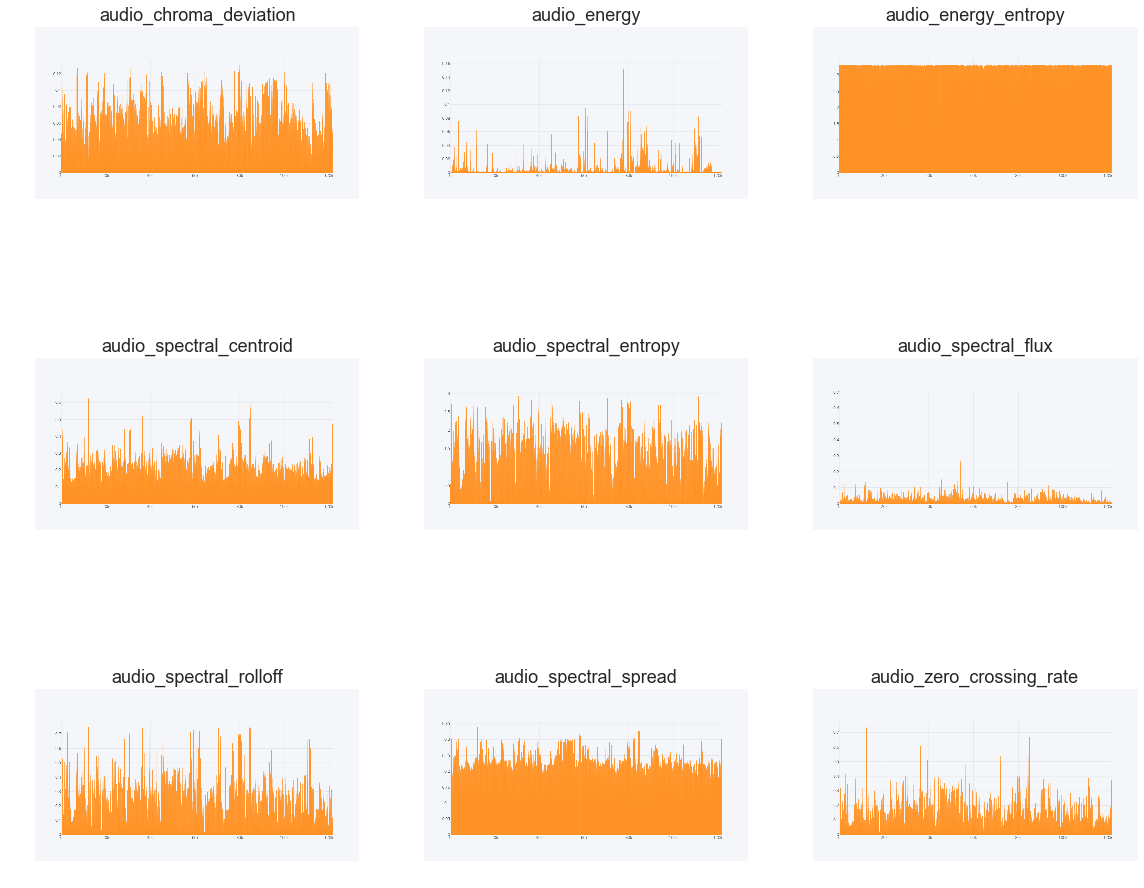

In [109]:
show_images(all_audio_images, cols=3, titles=all_audio_titles)

In [17]:
# # # Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# # # in the column 'City'
# # city_count  = df['City'].value_counts()
# # city_count = city_count[:10,]
# # plt.figure(figsize=(10,5))
# # sns.barplot(city_count.index, city_count.values, alpha=0.8)
# # plt.title('Starbucks in top 10 cities in the World')
# # plt.ylabel('Number of Occurrences', fontsize=12)
# # plt.xlabel('city', fontsize=12)
# # plt.show()

# sns.barplot(x="day", y="total_bill", data=short_term_features['zcr'])
# zcr_count = short_term_features['zcr'].value_counts()
# sns.barplot(x='asda', yzcr_count.index, zcr_count.values)

In [120]:
# import seaborn as sns

# f, ax = plt.subplots(figsize=(10, 8))
# corr = short_term_features.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

### Audio short-term features correlation matrix

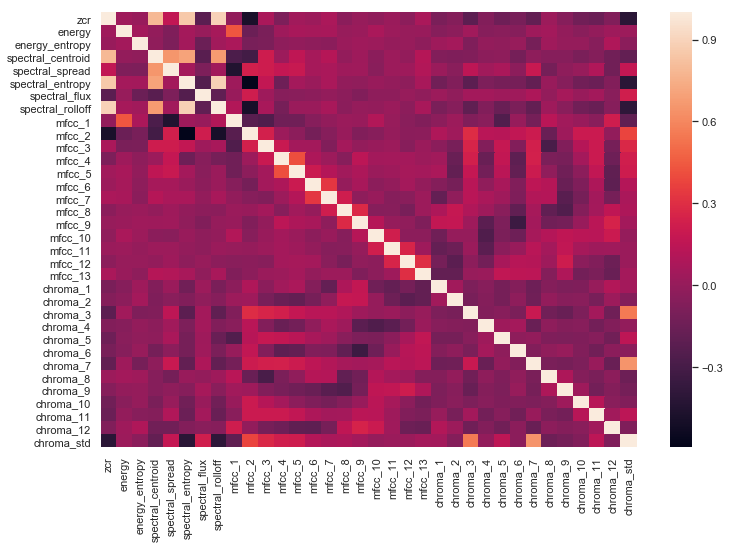

In [130]:
_, ax_audio_short = plt.subplots(figsize=(12, 8))
audio_short_corr = short_term_features.corr()
sns.heatmap(audio_short_corr, 
            xticklabels=audio_short_corr.columns.values,
            yticklabels=audio_short_corr.columns.values,
            ax=ax_audio_short);

### Audio mid-term features correlation matrix

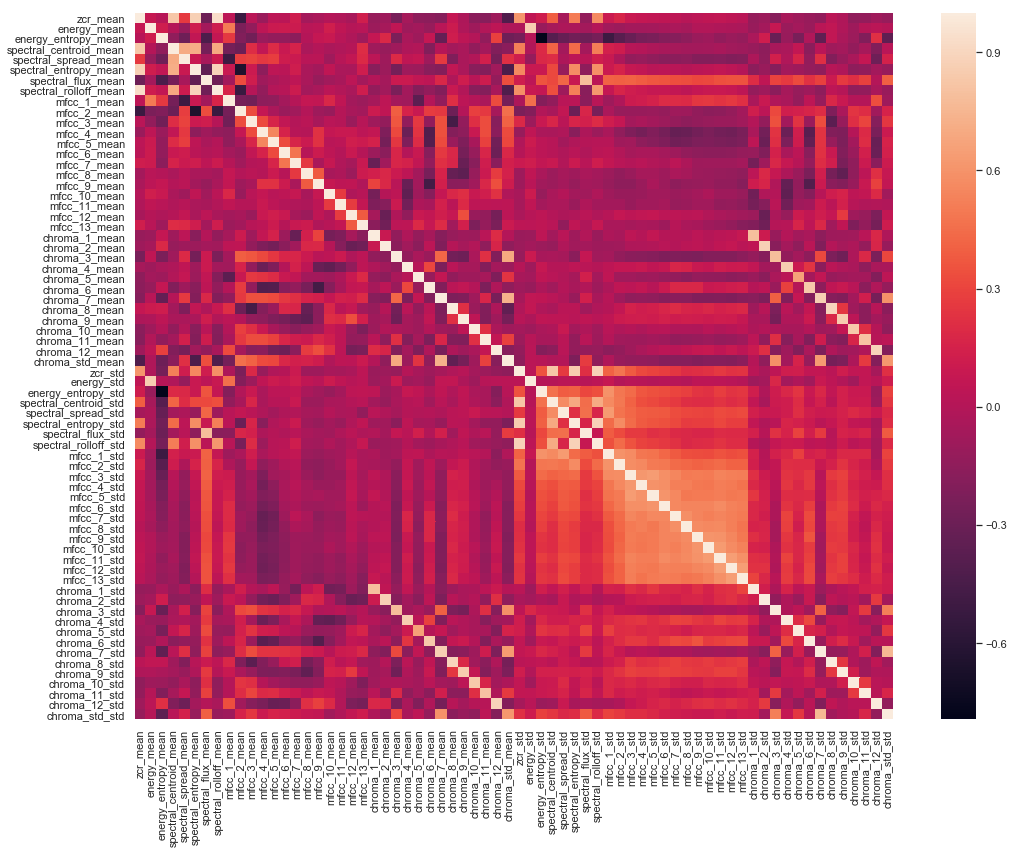

In [132]:
_, ax_audio_mid = plt.subplots(figsize=(17, 13))
audio_mid_corr = mid_term_features.corr()
sns.heatmap(audio_mid_corr, 
            xticklabels=audio_mid_corr.columns.values,
            yticklabels=audio_mid_corr.columns.values,
            ax=ax_audio_mid);